<a href="https://colab.research.google.com/github/gabifc/machine_learning_dell/blob/main/Oficina_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oficina 1 
## Modelo de previsão de preço de carros
**Aluna:** Gabrielle F Campos

Estudando um pouco sobre Machine Learning, você aprendeu que utilizar dados históricos para realizar previsões pode ser interessante, quando se quer agregar valor em pesquisas ou nos negócios de uma empresa, não é mesmo?

Os modelos de regressão em Machine Learning são, amplamente, utilizados para realizar essas previsões. Então, para que você possa exercitar seus conhecimentos nessa área, baixe o arquivo através do link “Regressao.ipynb”; carregue-o no ambiente do Jupyter notebook; siga as instruções contidas no arquivo; e execute como utilizar a biblioteca scikit-learn para construir um **modelo de previsão de preço de carros**, usando regressão linear múltipla. Para isso, use também um conjunto de dados com várias informações sobre carros usados em outro arquivo, que você pode baixar, acessando o link “car_data.csv”.


# Resposta

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Método utilizado para carregar os dados do drive. Esta atividade foi realizada no google colab.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Lendo os dados

In [3]:
df = pd.read_csv('/content/drive/MyDrive/car_data.csv')

In [4]:
display(df)

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,Gasolina,Revendedor,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Revendedor,Manual,0
2,ciaz,2017,7.25,9.85,6900,Gasolina,Revendedor,Manual,0
3,wagon r,2011,2.85,4.15,5200,Gasolina,Revendedor,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Revendedor,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Revendedor,Manual,0
297,brio,2015,4.00,5.90,60000,Gasolina,Revendedor,Manual,0
298,city,2009,3.35,11.00,87934,Gasolina,Revendedor,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Revendedor,Manual,0


# substituindo os dados que possuem textos por números.

In [6]:
df['tipo_transmissao'].replace({'Manual': 0, 'Automatico': 1}, inplace=True)
df['tipo_vendedor'].replace({'Revendedor': 0, 'Individual': 1}, inplace=True)
df['tipo_combustivel'].replace({'Gasolina': 0, 'Diesel': 1, 'GasNatural': 2}, inplace=True)
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Separando a variável dependente e as variáveis independentes

In [12]:
# escolhendo as variáveis independentes
# nome do carro não entra, vamos trabalhar apenas com campos numéricos

x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel', 'tipo_vendedor', 'tipo_transmissao', 'n_donos']].to_numpy()

In [13]:
# variável dependente - depende de todas as outras para definir o preço de venda.

y = df[['preco_venda']].to_numpy()

## Separar dados em treino e teste

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
# Vendo o número de registros que serão usados para o treino e teste
print('Treino')
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)

print('\nTeste')
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

Treino
x_train:  (240, 7)
y_train:  (240, 1)

Teste
x_test:  (61, 7)
y_test:  (61, 1)


## Treinando o modelo





In [20]:
from sklearn.linear_model import LinearRegression

# define um modelo de regressão
model = LinearRegression()

# treina o modelo com os dados de treino
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Previsão dos Preços - usando os 20% de teste

In [21]:
# y_pred contém a previsão dos preços do modelo
y_pred = model.predict(x_test)

In [22]:
# comparando a quantidade de dados usado para previsão com os dados teste com o que havia antes no y_test 
print(y_pred.shape)
print(y_test.shape)

(61, 1)
(61, 1)


# Plotar o preço dos carros, previsto pelo modelo versus os dados de teste

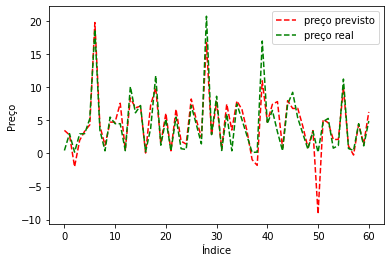

In [23]:
plt.plot(range(y_pred.shape[0]), y_pred,'r--')
plt.plot(range(y_test.shape[0]), y_test,'g--')
plt.legend(['preço previsto', 'preço real'])
plt.ylabel('Preço')
plt.xlabel('Índice')

plt.show()

**Análise dos dados:** em alguns casos o modelo tende a prever preços mais baixos do que o preço real de venda.





# Verificar o coeficiente de determinação do modelo com medida r2

In [24]:
from sklearn.metrics import r2_score

print('R2-score: ', r2_score(y_test, y_pred))

R2-score:  0.7884320399281436


**Análise dos dados:** Este modelo está prevendo corretamente 78% dos preços.

# **Para melhorar o R2 vou criar outro modelo com novas variáveis.**

Separando variáveis dependente e indepentende

In [26]:
# variáveis independentes
new_x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel']]

# variável dependente
new_y = df[['preco_venda']]

Separando os dados de treino e de teste

In [27]:
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.2)

In [28]:
# Vendo o número de registros que serão usados para o treino e teste
print('Treino')
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)

print('\nTeste')
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

Treino
x_train:  (240, 4)
y_train:  (240, 1)

Teste
x_test:  (61, 4)
y_test:  (61, 1)


Treinando o modelo

In [29]:
# define um modelo de regressão
new_model = LinearRegression()

# treina o modelo com os dados de treino
new_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Realizando a previsão

In [31]:
# y_pred contém a previsão dos preços do nosso modelo
y_pred = new_model.predict(x_test)

In [32]:
print(y_pred.shape)
print(y_test.shape)

(61, 1)
(61, 1)


Exibindo o gráfico com as previsões e os valores reais

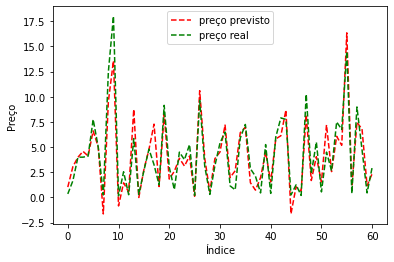

In [33]:
plt.plot(range(y_pred.shape[0]), y_pred,'r--')
plt.plot(range(y_test.shape[0]), y_test,'g--')
plt.legend(['preço previsto', 'preço real'])
plt.ylabel('Preço')
plt.xlabel('Índice')

plt.show()

R2 Score de 85% de acertividade

In [34]:
print('R2-score: ', r2_score(y_test, y_pred))

R2-score:  0.8537534916636657
